## Why estimate $f$?

We can think of a given dataset upon which we are working as a representation of some actual phenomenon. We can imagine there to be some sort of "universal" function, $f$, that was used to generate the data, one that we can never truly know.

As data scientists, we will seek to estimate this function. We will call our estimate $\widehat{f}$ ("eff hat").


## Why estimate $f$?

There are two mean reasons we might want to estimate $f$ with $\hat{f}$:

- prediction
   - given some set of known inputs and known outputs, we may wish to create some function that can take a new set of inputs and predict what the output would be for these inputs
- inference
   - given some set of known inputs and (optionally) known outputs, we may wish to understand how the inputs (and outputs) interact with each other


In [1]:
iris_df = read.csv('data/iris.csv', row.names=1)

In [2]:
summary(iris_df)

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [3]:
head(iris_df)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [4]:
library(repr)

In [5]:
options(repr.plot.width=20, repr.plot.height=10)

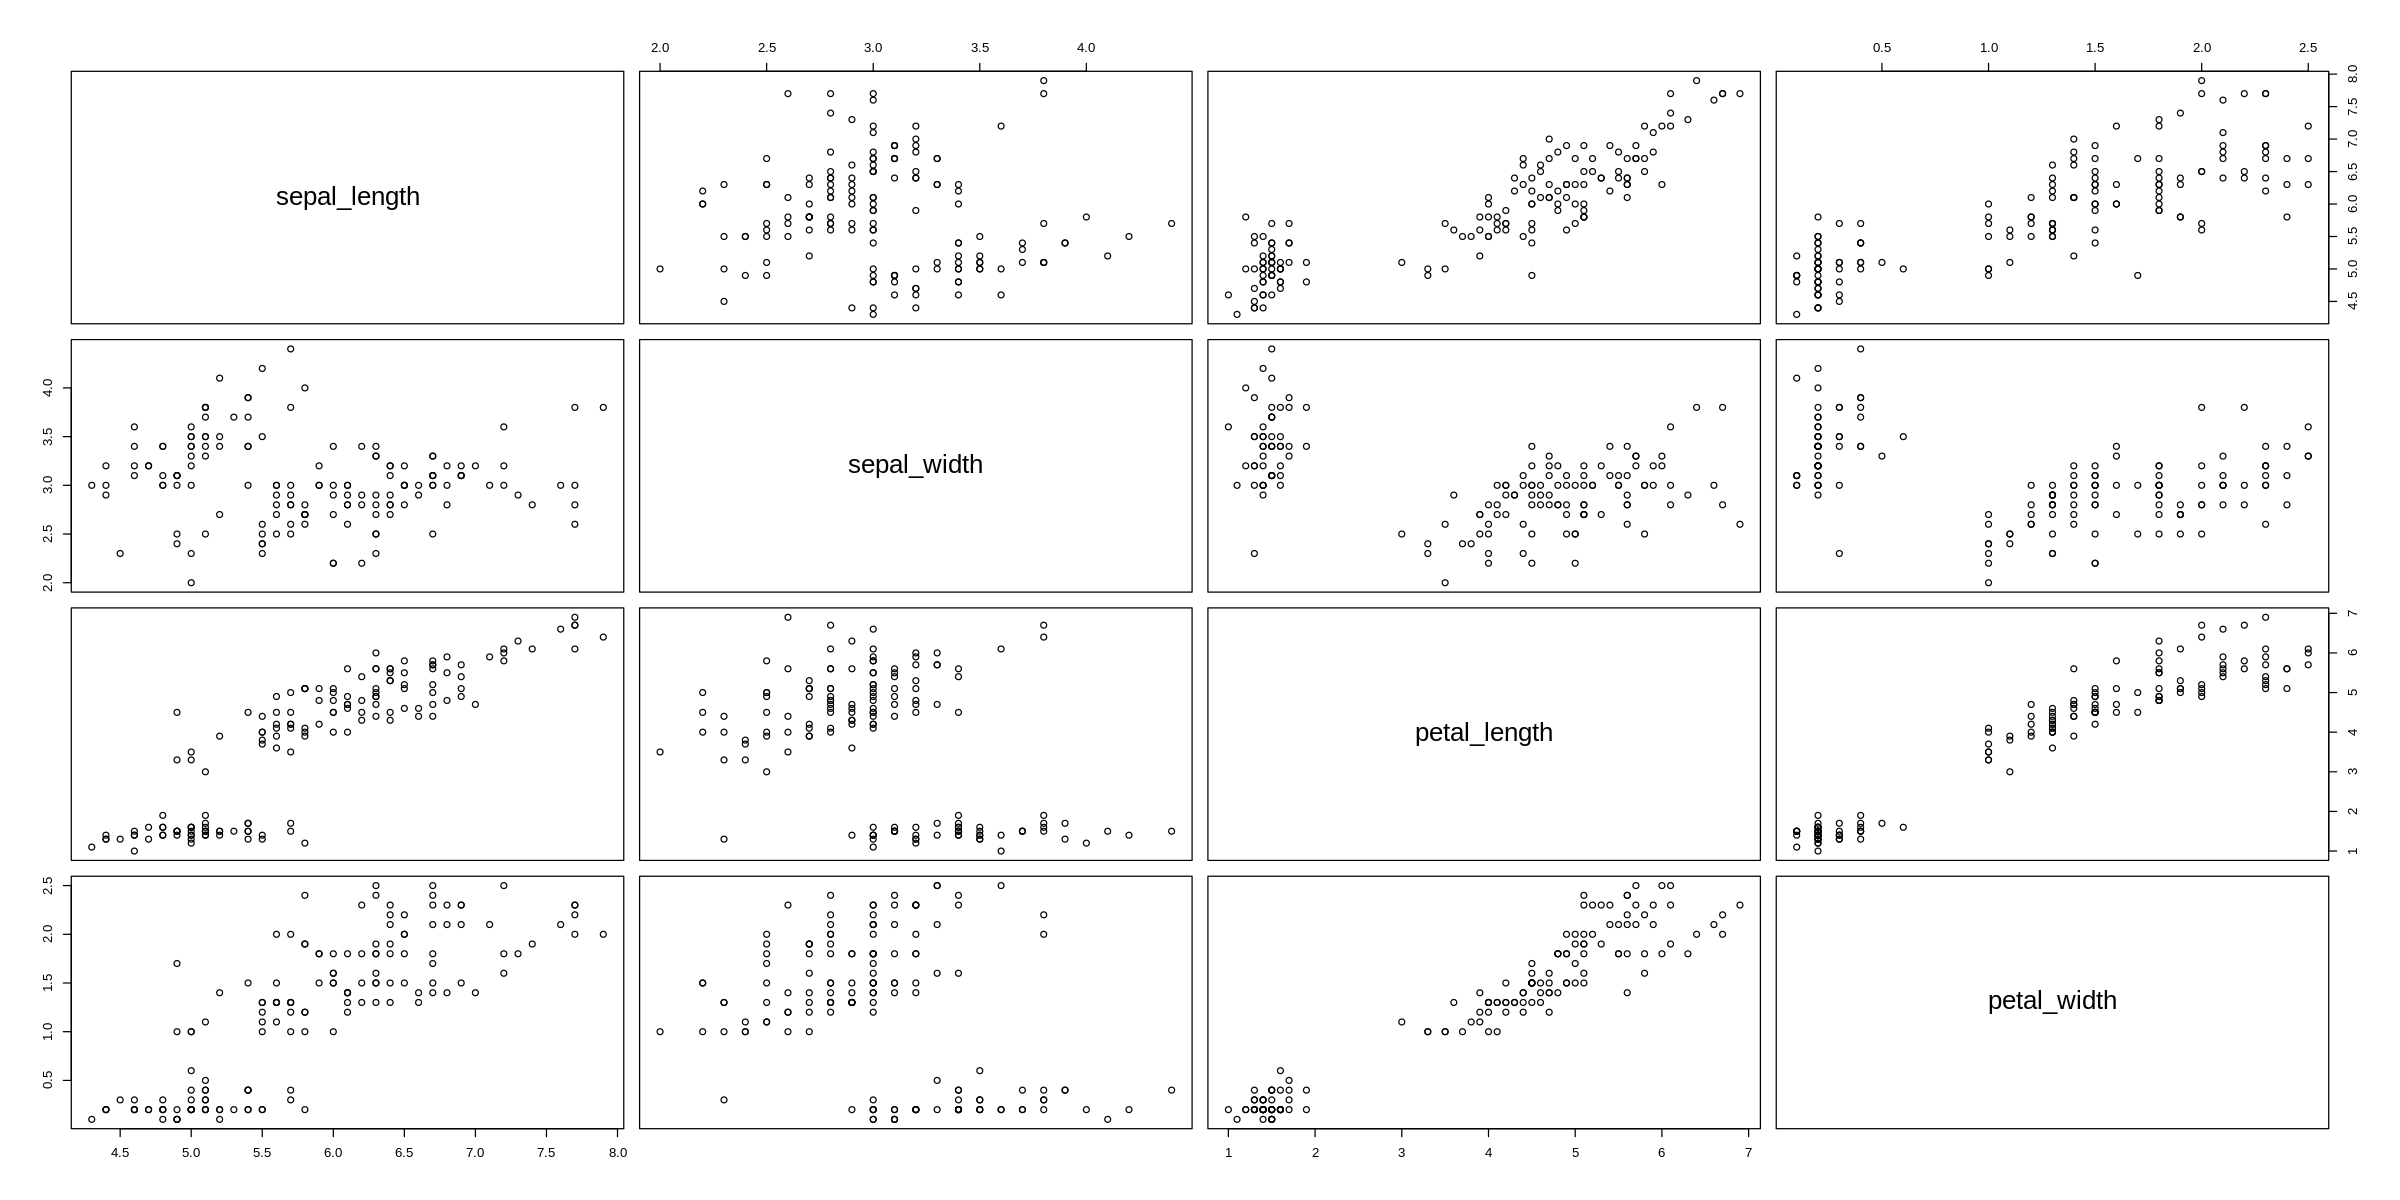

In [6]:
pairs(iris_df)

In [7]:
library(ggplot2)

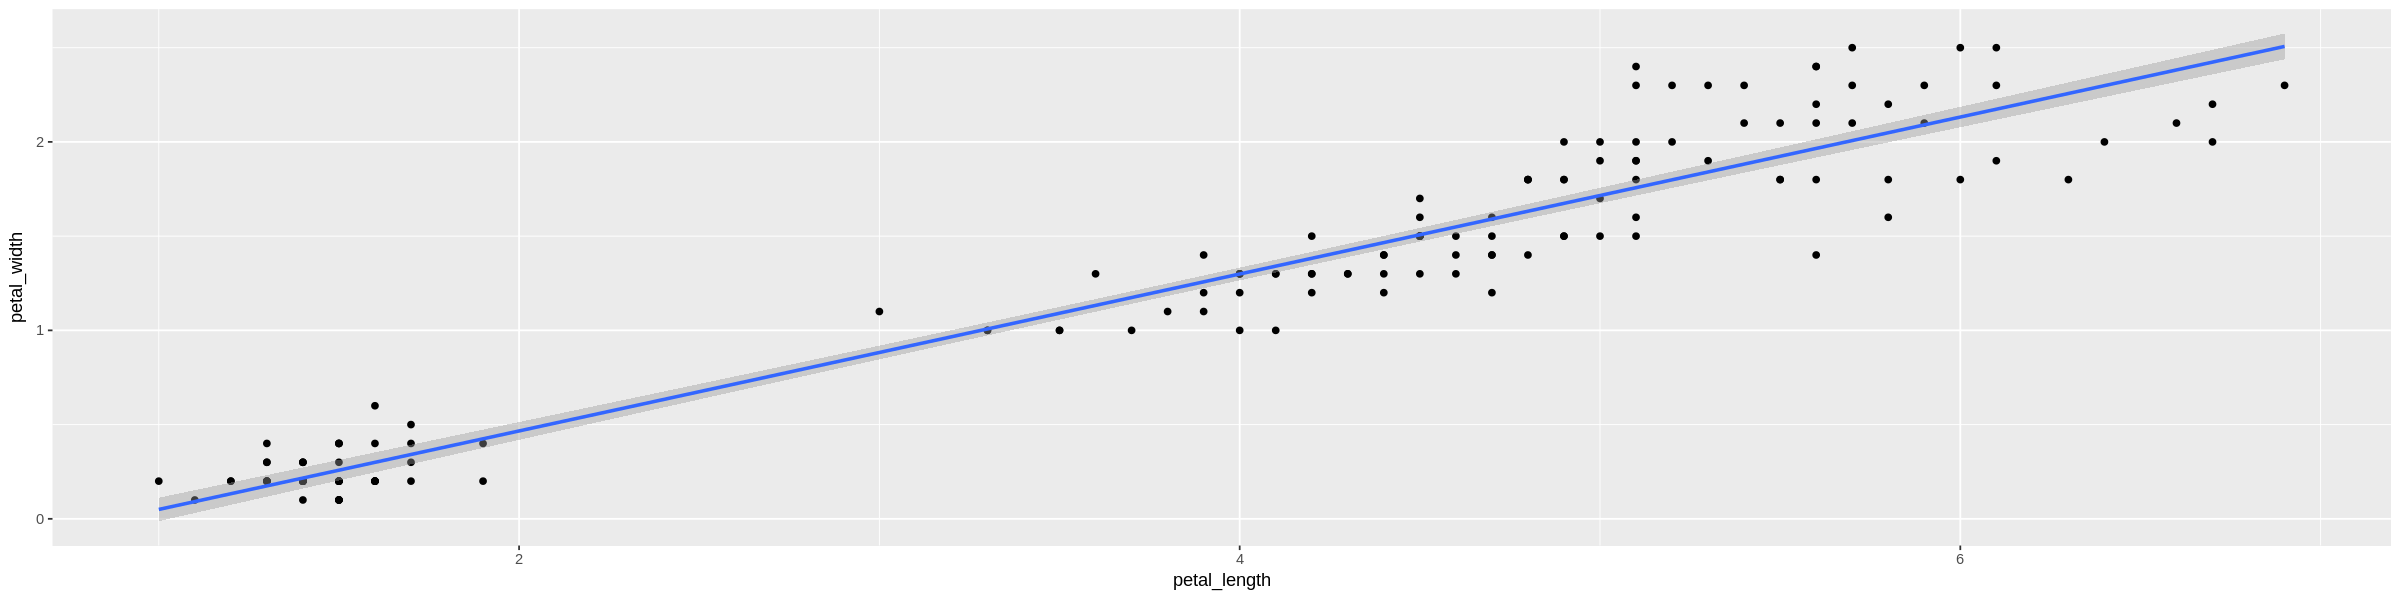

In [8]:
options(repr.plot.width=20, repr.plot.height=5)

ggplot(iris_df, aes(petal_length, petal_width)) +
  geom_point() + 
  geom_smooth(method='lm')

### Build a Simple Regression Model

Armed with this information we might say that we are able to predict petal width if we know petal length. We might build a **simple regression model** to do this for us using scikit-learn. Here, the **input variable** would be `petal length` and the **output variable** would be `petal width`.

We will usually refer to our input variable(s) as **feature(s)** and our output variable as the **target**.

In [9]:
lm_1_var = lm('petal_width ~ petal_length', iris_df)
lm_1_var


Call:
lm(formula = "petal_width ~ petal_length", data = iris_df)

Coefficients:
 (Intercept)  petal_length  
     -0.3665        0.4164  


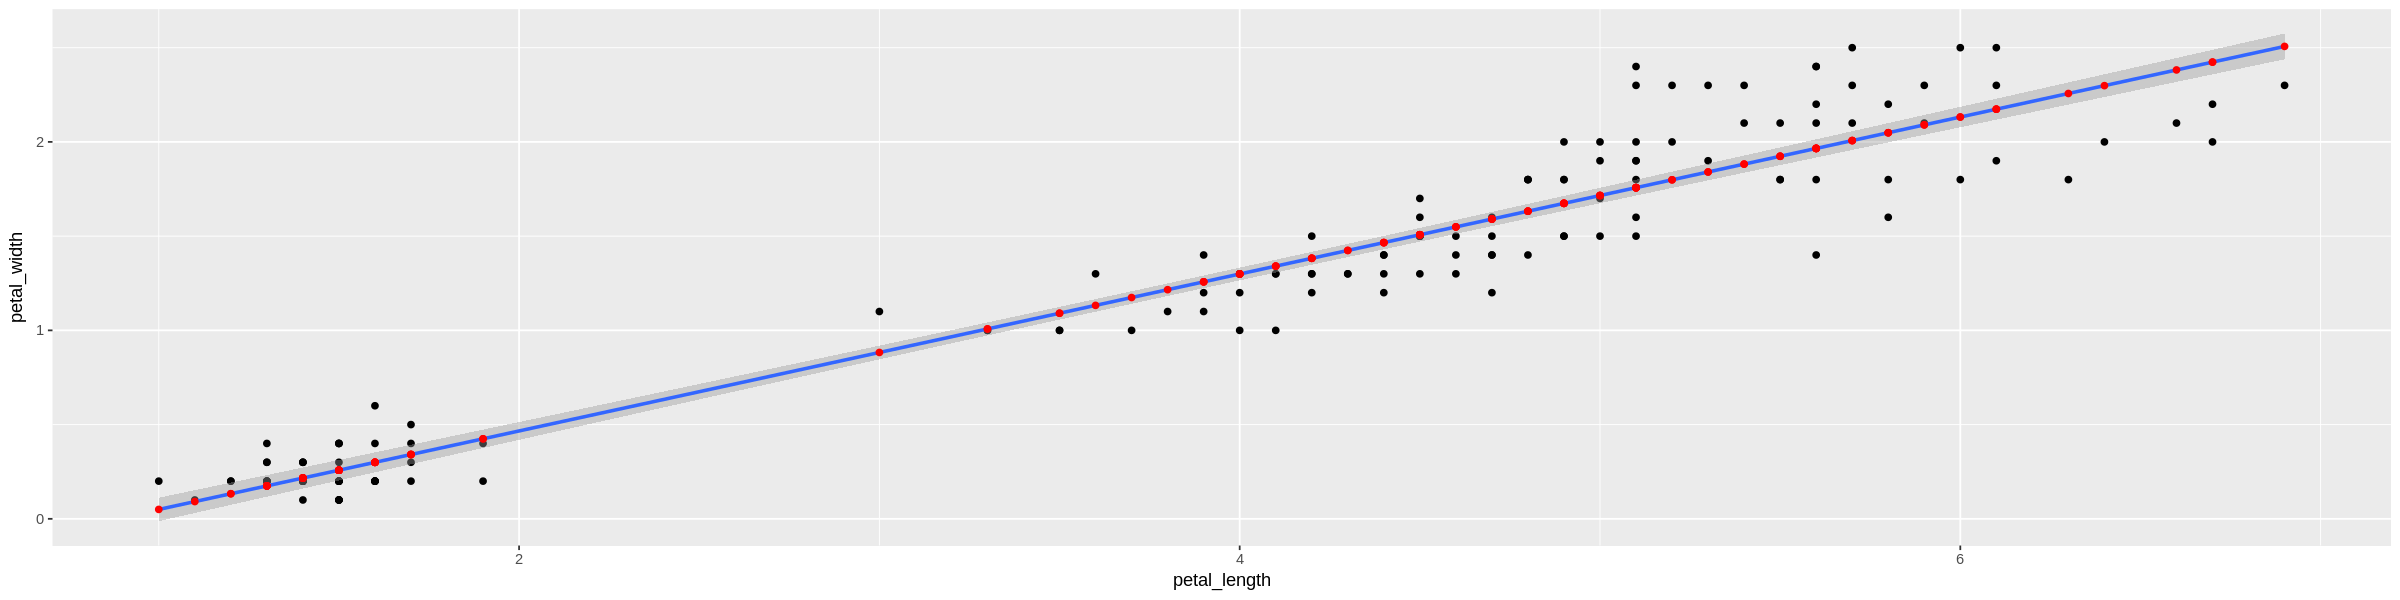

In [10]:
options(repr.plot.width=20, repr.plot.height=5)

iris_df$petal_width.prediction_1_var = predict(lm_1_var)

ggplot(iris_df, aes(petal_length, petal_width)) +
  geom_point() + 
  geom_smooth(method='lm') +
  geom_point(aes(petal_length, petal_width.prediction_1_var), color='red') 

In [11]:
lm('petal_width ~ petal_length + sepal_width + sepal_length', iris_df)


Call:
lm(formula = "petal_width ~ petal_length + sepal_width + sepal_length", 
    data = iris_df)

Coefficients:
 (Intercept)  petal_length   sepal_width  sepal_length  
     -0.2487        0.5261        0.2288       -0.2103  


## What can be inferred from the coefficients?

- Which predictors are associated with the response?
- What is the relationship between the response and each predictor?
- Can the relationship between Y and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

The predictors associated with predicting petal width are petal length, sepal width and sepal length. The relationship between the response (petal width) and the predictors are positive or above the linear regression or negative or below the linear regression. In this case the petal width increases as the petal length, sepal width, and sepal length increase. Generally as petal length increases the petal width increases. We can infer that the relationship can between the predictors can summarized using a linear relationship because we have a known input and are able to estimate how the input interacts in our model.